# Sara Ferrari, Michael Vizelman, Rachel Ward - DAV 6150 - M5 Assignment

## Introduction
In this assignment, we will be calculating a suite of classification model performance metrics via Python code functions that we create, and then comparing our results to those of pre-built Python functions that automatically calculate those same metrics.
We will also be creating graphical output via Python code that can be used to evaluate the performance of classification models. 

## Data
The data set we will be using for this work is comprised of 181 labeled binary observations
(i.e., the classification is binary in nature). The classifications are either ‘0’ or ‘1’. A classification model has
been used to “predict” the actual classifications for each observation, and its algorithm works by estimating
the probability that the correct classification for each observation is a ‘1’.  

The data set includes three attributes that we will make use of for our analysis:  

1) **class**: the actual classification for the observation  
2) **scored.class**: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold)  
3) **scored.probability**: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation  

## Approach
To accomplish this work, we will first use Pandas’ `crosstab()` function to calculate the contents of a confusion matrix for the data.   
Then, we will extract the individual confusion matrix values (i.e., True Positive, False Positive, True Negative, False
Negative) from the output of the crosstab() function and save them to individual variables for later use.

Next, we will write a Python function for each model evaluation metric (accuracy, precision, sensitivity, specificity, and F1 Score), that accepts as input the actual and predicted classifications for any binary classification data and then calculates and returns the metric for the predictions without utilizing any pre-built Python accuracy metric calculation functions.

Then, we will apply the Python functions we’ve created to the relevant columns of the provided data set to produce
the model performance metrics in this assignment.

Then, we will compare the output of our functions against the output of the pre-built functions available
within the scikit-learn library. Specifically, `confusion_matrix()`, `accuracy_score()`,
`precision_score()`, `recall_score()`, `f1_score()`, and the `metrics.classification_report()` functions to the relevant columns of the provided data set. 

Then, we will write a Python function to plot a ROC curve and also calculate AUC for any binary classification data
that contains both actual and predicted classifications as well as the associated scored probabilities
without utilizing any pre-built Python classification metric calculation or ROC or AUC functions.

Lastly, we will use the `metrics.plot_roc_curve()` and `metrics.auc()` functions from the scikit-learn package to
generate a ROC plot and calculate AUC for the provided data set, and compare the result with that of the ROC/AUC function we’ve created for this assignment.

## Load the data set

First we will read the provided M5_Data.csv into python using pandas read csv function.  

In [1]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#next read in the file
filename = 'https://raw.githubusercontent.com/vizelman/DAV-6150/master/M5_Data.csv'
data = pd.read_csv(filename)

#check results
data.head()

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


In [2]:
#check the dataset for null values
data.isnull().sum()

pregnant              0
glucose               0
diastolic             0
skinfold              0
insulin               0
bmi                   0
pedigree              0
age                   0
class                 0
scored.class          0
scored.probability    0
dtype: int64

We have made sure we have no missing values, and we can now proceed. 

## Confusion Matrix  
**create using `crosstab()` and compare to `confusion_matrix()` from sklearn**

We will first use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data.

In [3]:
#use crosstab() to calculate the contents of a confusion matrix for the data
conf_mat = pd.crosstab(data['class'],data['scored.class'])
#check results
conf_mat

scored.class,0,1
class,,
0,119,5
1,30,27


The `crosstab()` function accepts the factors (index, columns) and computes a frequency table of the factors. If we input the factors (actual classification, predicted classification) then the rows stand for actual classification and the columns stand for predicted classification. 

In [4]:
#make sure we understand the confusion matrix values
print(data['class'].value_counts())
print()
print(data['scored.class'].value_counts())

0    124
1     57
Name: class, dtype: int64

0    149
1     32
Name: scored.class, dtype: int64


The rows of the `crosstab()` output sum to the respective `value_counts()` of the actual classification input column.  
The columns of the `crosstab()` output sum to the respective `value_counts()` of the predicted classification input column.

We will now compare the output of the `crosstab()` function against the output of the pre-built `confusion_matrix()` function available within the scikit-learn library.

In [5]:
#compare with confusion_matrix() from sklearn 
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(data['class'], data['scored.class'])
#check results 
test_conf_mat

array([[119,   5],
       [ 30,  27]], dtype=int64)

The output is the same as our output from Pandas' `crosstab()` function.  
The `confusion_matrix()` function from the scikit-learn library accepts the factors (y_true, y_pred) and computes a confusion matrix.  

[From the Sklearn Documention](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) we know the following:  
"By definition a confusion matrix C is such that C(i,j) is equal to the number of observations known to be in group i and predicted to be in group j.  
Thus in binary classification, the count of true negatives is C(0,0), false negatives is C(1,0), true positives is C(1,1) and false positives is C(0,1)."   

We understand that the default positive label in the `confusion_matrix()` function, and all of the metrics functions in the scikit-learn library is 1.  
We will therefore use 1 as the positive label in the functions we create to allow for comparison.

We will now extract the individual confusion matrix values (i.e., True Positive, False Positive, True Negative, False
Negative) from the output of the crosstab() function, when the positive label is 1, and save them to individual variables for later use. 

In [6]:
#when '1' is the positive and '0' is the negative
tp = conf_mat.iloc[1][1]
fp = conf_mat.iloc[0][1]
tn = conf_mat.iloc[0][0]
fn = conf_mat.iloc[1][0]

#check results
print("True Positive = %s" %tp)
print("False Positive = %s" %fp)
print("False Negative = %s" %fn)
print("True Negative = %s" %tn)

True Positive = 27
False Positive = 5
False Negative = 30
True Negative = 119


We now understand the output of Pandas' `crosstab()`, and are able to extract the individual confusion matrix values.  
We can now proceed with creating our functions, utilizing the code above.   

We will create a function `conf_mat_vals()` that accepts as input the actual and predicted classifications 
for any binary classification data and then using Pandas' `crosstab()` creates a confusion matrix and returns the values for: True Positive, False Positive, True Negative, False Negative. We will call this function later on in our other functions. 

Pandas' `crosstab()` function will generate a full confusion matrix only if there are two classes in the binary predictions column.  If there is only one class the function will not create a column for the other class. In that case our function will assign the value 0 to the appropriate value in the confusion matrix. 

In [7]:
#create a function that creates a confusion matrix and returns the values for:
#True Positive, False Positive, True Negative, False Negative
def conf_mat_vals (actual, predicted):
    '''This function accepts as input the actual and predicted classifications 
       for any binary classification data and then creates a confusion matrix and returns the values for:
       True Positive, False Positive, True Negative, False Negative'''
    #create confusion matrix using Pandas' crosstab()
    conf_mat = pd.crosstab(actual,predicted)
    #extract the individual confusion matrix values
    #if the predictions are all of one class,
    #the crosstab() function will not create a column for the second binary class
    #therefore, we use try/except to assign a value to the metrics if there is a missing column in the conf_mat
    try:
        tp = conf_mat.iloc[1][1]
    except:
        tp = 0
    try:
        fp = conf_mat.iloc[0][1]
    except:
        fp = 0
    try:
        tn = conf_mat.iloc[0][0]
    except:
        tn = 0
    try:
        fn = conf_mat.iloc[1][0]
    except:
        fn = 0 
    return tp,fp,tn,fn

## Accuracy Function
**create our own and compare to `accuracy_score()` from sklearn**  

We will now write a Python function that accepts as input the actual and predicted classifications for any binary
classification data and then calculates and returns the accuracy metric for the predictions.  
The accuracy formula is:  $accuracy = (tp+tn)/(tp+fp+tn+fn)$

In [8]:
#create a function that calculate and returns the accuracy metric
def accuracy(actual, predicted):
    '''This function accepts as input the actual and predicted classifications 
       for any binary classification data and then calculates and returns the
       accuracy metric for the predictions'''
    #get tp,fp,tn,fn vals 
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculate the accuracy metric
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    return accuracy

We will now compare the output of our function against the output of the pre-built `accuracy_score()` function available within the scikit-learn library.

In [9]:
#apply our function to the dataset 
our_accuracy = accuracy(data['class'],data['scored.class'])
print("Accuracy with our function is:%s" %our_accuracy)

#import function from sklearn 
from sklearn.metrics import accuracy_score
#apply function to the dataset 
sklearn_accuracy = accuracy_score(data['class'],data['scored.class'])
print("Accuracy with sklearn function is:%s" %sklearn_accuracy)

#compare our function result with the result of accuracy_score() from sklearn
if round(our_accuracy,4) == round(sklearn_accuracy,4):
    print ("The accuracy results are the same!")
else:
    print ("The results are not the same!")

Accuracy with our function is:0.8066298342541437
Accuracy with sklearn function is:0.8066298342541437
The accuracy results are the same!


## Precision Function
**create our own and compare to `precision_score()` from sklearn**  

We will now write a Python function that accepts as input the actual and predicted classifications for any binary
classification data and then calculates and returns the precision metric for the predictions.      
The precision formula is: $precision = (tp)/(tp+fp)$

In [10]:
#create a function that calculate and returns the precision metric
def precision (actual, predicted):
    '''This function accepts as input the actual and predicted classifications 
       for any binary classification data and then calculates and returns the
       precision metric for the predictions'''
    #get tp,fp,tn,fn vals 
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculate the precision metric
    if (tp+fp)>0:
        precision = (tp)/(tp+fp)
        return precision
    else: #if the metric cannot be calculated it is 0
        return 0   

We will now compare the output of our function against the output of the pre-built `precision_score()` function available within the scikit-learn library.

In [11]:
#apply our function to the dataset
our_precision = precision(data['class'],data['scored.class'])
print("Precision with our function is:%s" %our_precision)

#import function from sklearn 
from sklearn.metrics import precision_score
#apply function to the dataset
sklearn_precision = precision_score(data['class'],data['scored.class'])
print("Precision with sklearn function is:%s" %sklearn_precision)

#compare our function result with the result of precision_score() from sklearn
if round(our_precision,4) == round(sklearn_precision,4):
    print ("The results are the same!")
else:
    print ("The results are not the same!")

Precision with our function is:0.84375
Precision with sklearn function is:0.84375
The results are the same!


## Sensitivity Function
**create our own and compare to `recall_score()` from sklearn**

We will now write a Python function that accepts as input the actual and predicted classifications for any binary
classification data and then calculates and returns the sensitivity metric for the predictions.  
The sensitivity formula is: $sensitivity = (tp)/(tp+fn)$

In [12]:
#create a function that calculate and returns the sensitivity metric
def sensitivity (actual, predicted):
    '''This function accepts as input the actual and predicted classifications 
       for any binary classification data and then calculates and returns the
       sensitivity metric for the predictions'''
    #get tp,fp,tn,fn vals 
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculate the sensitivity metric
    if (tp+fn)>0 :
        sensitivity = (tp)/(tp+fn)
        return sensitivity
    else: #if the metric cannot be calculated it is 0
        return 0

We will now compare the output of our function against the output of the pre-built `recall_score()` function available within the scikit-learn library.

In [13]:
#apply our function to the dataset
our_sensitivity = sensitivity(data['class'],data['scored.class'])
print("Sensitivity with our function is:%s" %our_sensitivity)

#import function from sklearn 
from sklearn.metrics import recall_score
#apply function to the dataset
sklearn_sensitivity = recall_score(data['class'],data['scored.class'])
print("Sensitivity with sklearn function is:%s" %sklearn_sensitivity)

#compare our function result with the result of recall_score() from sklearn
if round(our_sensitivity,4) == round(sklearn_sensitivity,4):
    print ("The results are the same!")
else:
    print ("The results are not the same!")

Sensitivity with our function is:0.47368421052631576
Sensitivity with sklearn function is:0.47368421052631576
The results are the same!


## Specificity Function
**create our own and compare to `recall_score(pos_label=0)` from sklearn**

We will now write a Python function that accepts as input the actual and predicted classifications for any binary
classification data and then calculates and returns the specificity metric for the predictions.  
The specificity formula is: $specificity = tn / (tn + fp)$

In [14]:
#create a function that calculate and returns the specificity metric
def specificity (actual, predicted):
    '''This function accepts as input the actual and predicted classifications 
       for any binary classification data and then calculates and returns the
       specificity metric for the predictions'''
    #get tp,fp,tn,fn vals 
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculate the specificity metric
    if (tn+fp)>0 :
        specificity = (tn)/(tn+fp)
        return specificity
    else: #if the metric cannot be calculated it is 0
        return 0

There is no specificity function in sklearn. However, the `recall_score()` function can evaluate the specificity by applying the same formula and changing what is considered positive to be the 0 values.   
We will now compare the output of our function against the output of the pre-built `recall_score(pos_label=0)` function available within the scikit-learn library.

In [15]:
#apply our function to the dataset
our_specificity = specificity(data['class'],data['scored.class'])
print("Specificity with our function is:%s" %our_specificity)

#import function from sklearn 
from sklearn.metrics import recall_score
#apply function to the dataset
sklearn_specificity = recall_score(data['class'],data['scored.class'],pos_label=0)
print("Specificity with sklearn function is:%s" %sklearn_specificity)

#compare our function result with the result of recall_score(pos_label=0) from sklearn
if round(our_specificity,4) == round(sklearn_specificity,4):
    print ("The results are the same!")
else:
    print ("The results are not the same!")

Specificity with our function is:0.9596774193548387
Specificity with sklearn function is:0.9596774193548387
The results are the same!


## F1 Score Function
**create our own and compare to `f1_score(pos_label=0)` from sklearn**

We will now write a Python function that accepts as input the actual and predicted classifications for any binary
classification data and then calculates and returns the F1 score metric for the predictions.  
The F1 score formula is: $F1 score = 2*(sensitivity * precision) / (sensitivity + precision)$

In [16]:
#create a function that calculates and returns the F1 score
def F1_score (actual, predicted):
    '''This function accepts as input the actual and predicted classifications 
       for any binary classification data and then calculates and returns the
       F1 score metric for the predictions'''
    #call the function we created to calculate the sensitivity metric
    sensitivity_value=sensitivity(actual,predicted)
    #call the function we created to calculate the precision metric
    precision_value=precision(actual,predicted)
    #calculate the F1 Score metric
    F1 = 2*(sensitivity_value*precision_value)/(sensitivity_value+precision_value)
    return F1

We will now compare the output of our function against the output of the pre-built `f1_score()` function available within the scikit-learn library.

In [17]:
#apply our function to the dataset
our_F1_score = F1_score(data['class'],data['scored.class'])
print("F1 Score with our function is:%s" %our_F1_score)

#import function from sklearn 
from sklearn.metrics import f1_score
#apply function to the dataset
sklearn_F1_score = f1_score(data['class'],data['scored.class'])
print("F1 Score with sklearn function is:%s" %sklearn_F1_score)

#compare our function result with the result of f1_score() from sklearn
if round(our_F1_score,4) == round(sklearn_F1_score,4):
    print ("The results are the same!")
else:
    print ("The results are not the same!")

F1 Score with our function is:0.6067415730337079
F1 Score with sklearn function is:0.6067415730337079
The results are the same!


## Classification Report Function 
**Show the report using `classification_report()` from sklearn, and compare to our earlier results**

In [18]:
#import the function from sklearn
from sklearn.metrics import classification_report

#apply the function to the dataset and check results
print(classification_report(data['class'],data['scored.class']))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



The results in the output of the `classification_report()` function are the same as the results in the output of the functions we created ourselves.  

## Function to plot a ROC curve and calculate AUC
**create our own and compare to `metrics.plot_roc_curve()` and `metrics.auc()` from sklearn**

We will now write a Python function that accepts as input the actual and predicted classifications 
for any binary classification data, as well as the associated scored probabilities,
and then plots the ROC curve and calculates and returns the AUC.

In [26]:
#create a function that plots the ROC Curve and calculates the AUC 
def roc(actual, predicted, probability):
    '''This function accepts as input the actual and predicted classifications 
       for any binary classification data, as well as the associated scored probabilities,
       and then plots the ROC curve and calculates and returns the AUC'''
    #create list of thresholds
    thresholds = np.arange(0,1,0.01)
    #create list of true positive rates
    tpr_list=[]
    #create list of false positive rates
    fpr_list=[]
    #create new list of predictions for every threshold
    for i in thresholds: #for every threshold
        new_predicted=[] #create new list of predictions
        for j in range(len(probability)): #for each observation
            #compare threshold to probability and append new prediction
            if probability[j] < i:        
                new_predicted.append(0)
            else:
                new_predicted.append(1)
        #calculate the tpr
        tpr = sensitivity(actual, pd.Series(new_predicted))
        tpr_list.append(tpr) #append the true positive rate to the list
        #calculate the fpr
        fpr = 1 - specificity(actual, pd.Series(new_predicted))
        fpr_list.append(fpr) #append the false positive rate to the list
    #construct a data frame for plotting the ROC
    roc_df = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr_list, 'tpr': tpr_list})
    #plot ROC
    #use step plot for easy comparison with plot_roc_curve() from sklearn
    plt.step(roc_df['fpr'], roc_df['tpr'], 'b-', label = 'model');
    #plot a naive classifier as a reference 
    plt.plot([0, 1], [0, 1], 'r--', label = 'naive classifier');
    #add axis labels, title and legend
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
    #calculate the AUC value
    x = roc_df['fpr'].copy() #create a copy of the fpr column
    y = roc_df['tpr'].copy() #create a copy of the tpr column
    x.sort_values(inplace = True) #sort the values in ascending order so that we will get a positive area result
    y.sort_values(inplace = True) #sort the values in ascending order so that we will get a positive area result
    auc = np.trapz(y,x) #calculate the AUC using numpy's trapz function
    print("The AUC is: ", auc) #print AUC

We will now compare the output of our function against the output of the pre-built `plot_roc_curve()` and `metrics.auc()` functions available within the scikit-learn library.

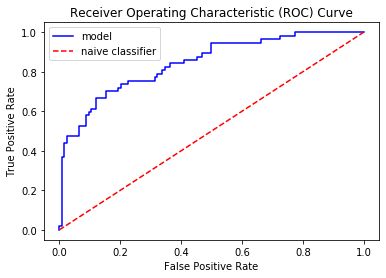

The AUC is:  0.8488964346349746


In [27]:
#apply our function to the dataset
roc(data['class'],data['scored.class'],data['scored.probability'])

The `plot_roc_curve()` function in sklearn requires a classifier instance as an input. Since the assignment requires us to compare the output of the function with the output of our function, we decided to use the SVC classifier from sklearn as the classifier instance. Since we do not know which features were used in the model that our dataset is based upon, we used all the available features.

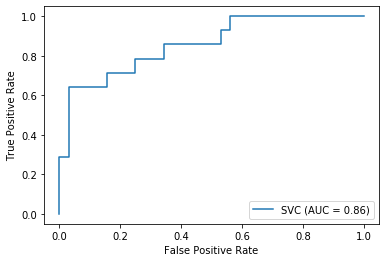

In [21]:
#compare our function result with the result of plot_roc_curve() from sklearn
#code from plot_roc_curve() documentation - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html
from sklearn import metrics, model_selection, svm 
from sklearn.svm import SVC
X = data[['pregnant', 'glucose', 'diastolic', 'skinfold', 'insulin', 'bmi', 'pedigree', 'age']].copy()
y = data['class'].copy()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
metrics.plot_roc_curve(clf, X_test, y_test) 
plt.show()

In [22]:
#compare our function result with the result of metrics.auc() from sklearn
#metrics.auc() documentation - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html
#metrics.roc_curve() documentation - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
from sklearn import metrics
y = data['class'] #the actual class
pred = data['scored.probability'] #probability estimates of the positive class
fpr2, tpr2, thresholds2 = metrics.roc_curve(y, pred, pos_label=1) #apply roc_curve() to get fpr, tpr
auc = metrics.auc(fpr2, tpr2) #print the AUC
print("The AUC is:", auc)

The AUC is: 0.8503112620260327


While the ROC curve generated by the sklearn function appears to have used different thresholds, the ROC curve generated by our function has roughly the same shape, and the AUC from our function is nearly the same.   
Now we will also use sk-learn's `roc_curve()` results from above to graph the ROC curve as a double check.

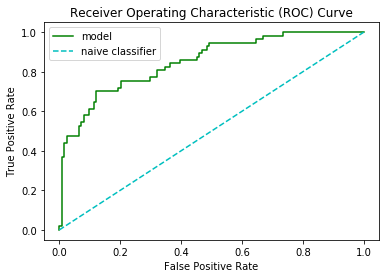

In [23]:
#plot ROC curve using the fpr and tpr output from the roc_curve() function in sklearn
#use step plot for easy comparison with plot_roc_curve() from sklearn
plt.plot(fpr2, tpr2, 'g-', label = 'model');
#plot a naive classifier as a reference 
plt.plot([0, 1], [0, 1], 'c--', label = 'naive classifier');
#add axis labels, title and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The graph generated from plotting the `roc_curve()` function results is extremely similar to the graph generated by our own function. This gives us further confidence that our function is yielding accurate results. 